2. This question involves the use of simple linear regression on the Auto data set.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [36]:
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)


In [4]:
import sklearn.linear_model as lm
import statsmodels.formula.api as smf

In [50]:
auto = pd.read_csv('/Users/jason/documents/UMKC/Fall_2018/Statistical_Learning/Lab1/Auto_Lab2.csv', na_values='?').dropna()

In [142]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,260.0,3404,13.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,170.0,3593,12.5,70,1,buick skylark 320
2,18.0,8,318.0,155.0,3336,12.0,70,1,plymouth satellite
3,16.0,8,304.0,155.0,3333,13.0,70,1,amc rebel sst
4,17.0,8,302.0,145.0,3349,11.5,70,1,ford torino


In [52]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

a) Use the lm()function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. 

In [72]:
lm_fit = smf.ols(formula='mpg~horsepower', data=auto).fit()

In [73]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     567.1
Date:                Wed, 19 Sep 2018   Prob (F-statistic):           4.86e-78
Time:                        21:09:03   Log-Likelihood:                -1185.2
No. Observations:                 392   AIC:                             2374.
Df Residuals:                     390   BIC:                             2382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.2666      0.750     53.695      0.000      38.792      41.741
horsepower    -0.1532      0.006    -23.815      0.000      -0.166      -0.141
==============================================================================
Omnibus:                       23.042   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.619
Skew:                           0.578   Prob(JB):                     2.73e-06
Kurtosis:                       3.483   Cond. No.                         347.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i.Is there a relationship between the predictor and the response?

Yes, the p-value related to the predictor variable is close to zero. This indicates that we can reject the null.

ii.How strong is the relationship between the predictor and the response?

The R^2 value tells us that approximately 60% of the variability in mpg can be explained by horsepower.

iii.Is the relationship between the predictor and the response positive or negative?

Negative

iv.What is the predicted mpg associated with a horsepowerof 98? What are the associated 95% confidence and prediction intervals?

In [55]:
new = pd.DataFrame([[1, 98]], columns=['Intercept', 'horsepower'])

In [74]:
lm_fit.predict(new)

0    25.251997
dtype: float64

In [75]:
def predict(res, new):
    
    # Get the predicted values
    fit = pd.DataFrame(res.predict(new), columns=['fit'])
    
    # Get the confidence interval for the model (and rename the columns to something a bit more useful)
    ci = res.conf_int().rename(columns={0: 'lower', 1: 'upper'})
    
    # Now a little bit of matrix multiplication to get the confidence intervals for the predictions
    ci = ci.T.dot(new.T).T
    
    # And finally wrap up the confidence intervals with the predicted values
    return pd.concat([fit, ci], axis=1)

In [76]:
predict(lm_fit, new)

,fit,lower,upper
0,25.251997,22.538064,27.96593


b) Plot the response and the predictor. Display the least squares regression line.

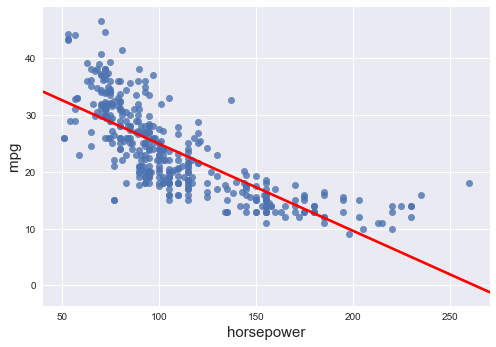

In [77]:
sns.regplot('horsepower', 'mpg', auto, line_kws = {"color":"r"}, ci=None)

c) Produce diagnostic plots of the least squares regressionfit. Comment on any problems you see with the fit.

In [78]:
# fitted values (need a constant term for intercept)
model_fitted_y = lm_fit.fittedvalues

# model residuals
model_residuals = lm_fit.resid

# normalized residuals
model_norm_residuals = lm_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = lm_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = lm_fit.get_influence().cooks_distance[0]

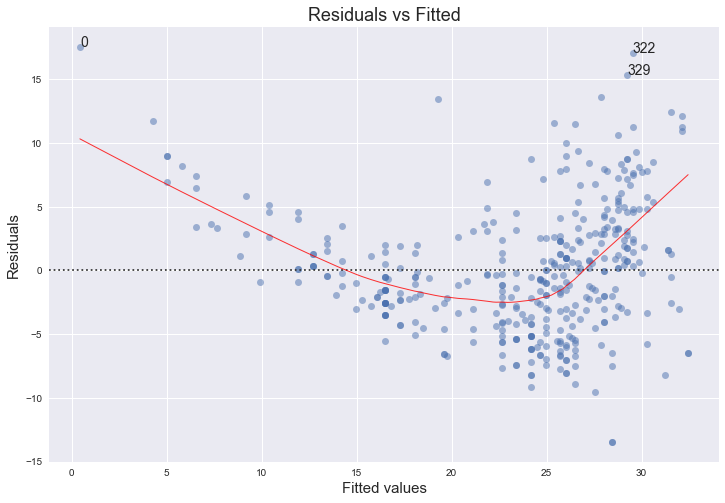

In [79]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'mpg', data=auto,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

The residual plot shows a clear trend. This indicates that the relationship between our response and predictors is most likely non-linear.

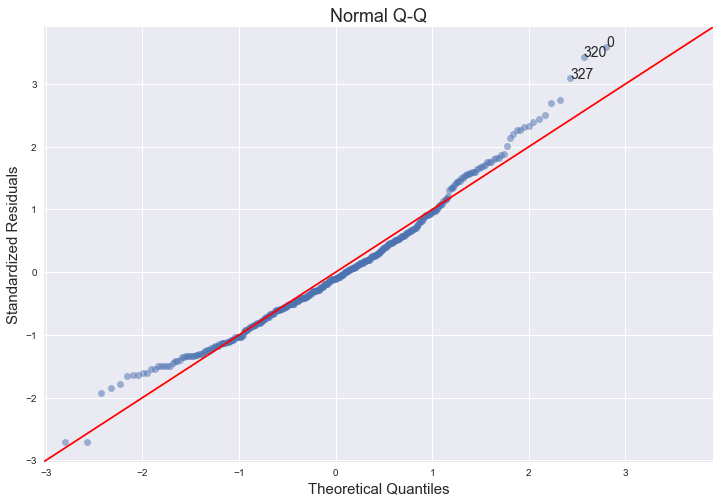

In [80]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

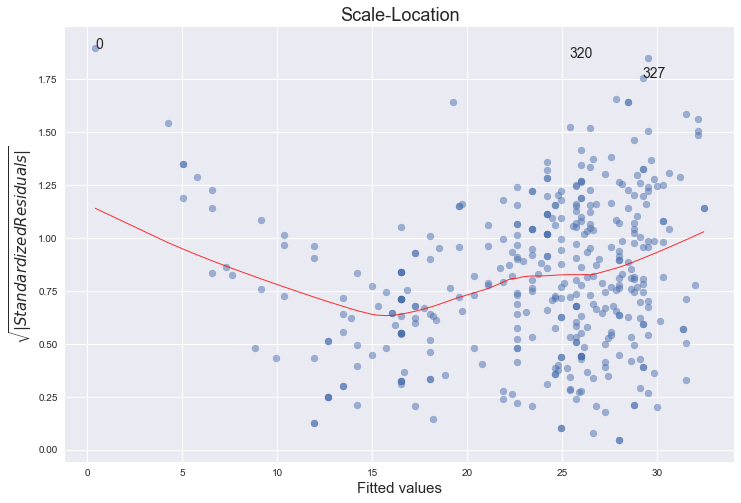

In [81]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

The studentized residual plot is used to detect the presence of outliers. Observations 0, 320, and 327 are approaching a value of 2 indicating potential outliers. However, these do not exceed the threshold of abs(+-3)

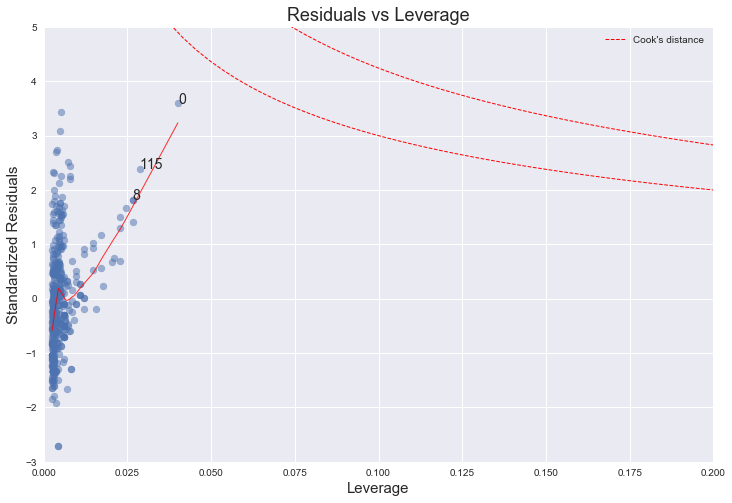

In [82]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(lm_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line

plt.legend(loc='upper right');

The leverage plots suggests that observations 8, 115, and 0 may be suspect to high leverage. The given leverage statistic threshold is (p+1)/n corresponding to an approximate value of 0.005. These values exceed this point.

3. This question involves the use of multiple linear regression on the Auto data set.

(a)Produce a scatterplot matrix which includes all of the variables in the data set.

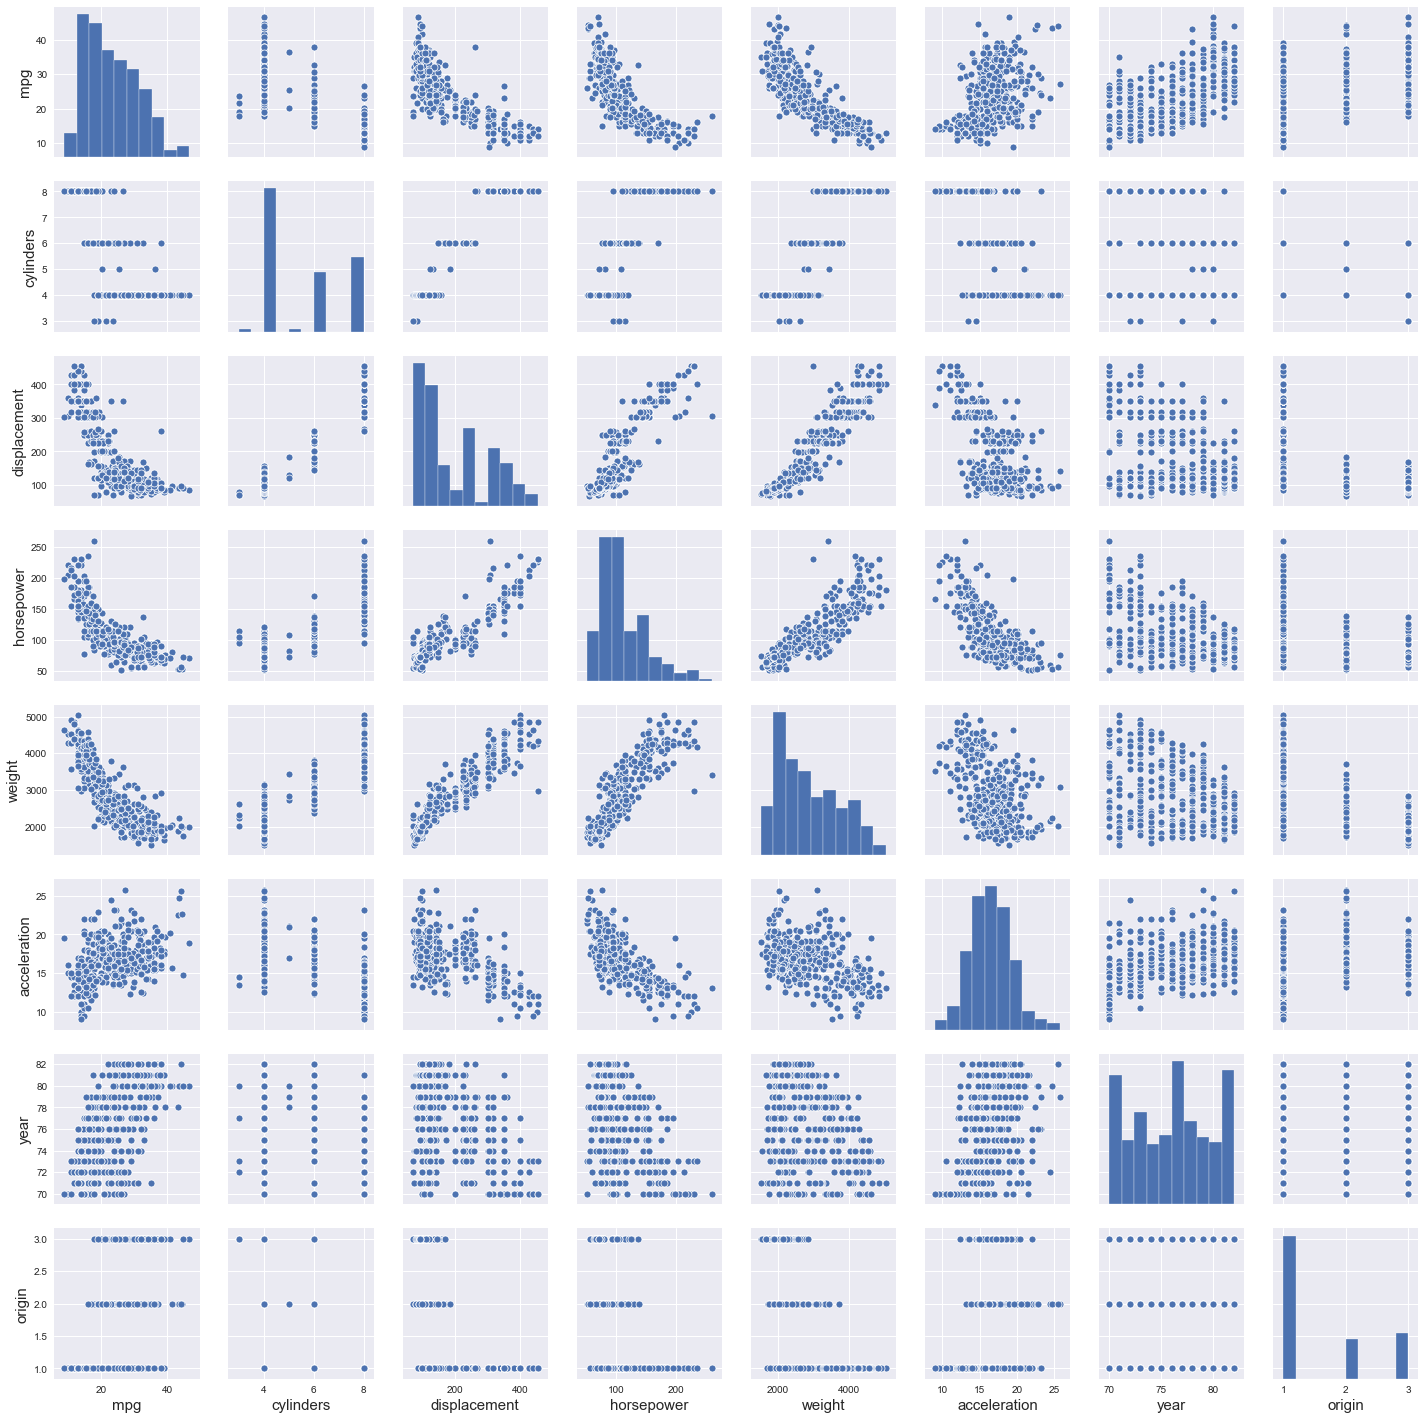

In [65]:
sns.pairplot(auto)

(b) Compute the matrix of correlations between the variables

In [66]:
cm = auto.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask = ~mask

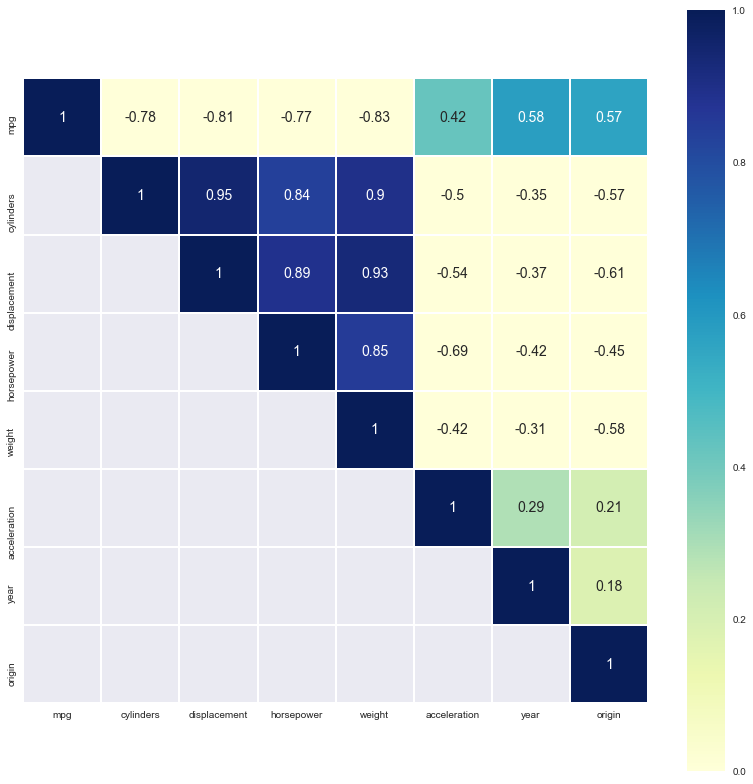

In [67]:
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(cm, annot=True, mask=mask, vmin=0, vmax=1, linewidths=1, cmap='YlGnBu', square=True)
plt.show()

(c) Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary()function to print the results. Comment on the output. 

In [69]:
columns_selected = "+".join(auto.columns.difference(["mpg","name"]))
my_formula = "mpg~" + columns_selected
my_formula

'mpg~acceleration+cylinders+displacement+horsepower+origin+weight+year'

In [71]:
lm_fit2 = smf.ols(formula = my_formula, data=auto).fit()
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     251.3
Date:                Wed, 19 Sep 2018   Prob (F-statistic):          4.15e-139
Time:                        21:08:53   Log-Likelihood:                -1024.2
No. Observations:                 392   AIC:                             2064.
Df Residuals:                     384   BIC:                             2096.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -19.0653      4.706     -4.051      0.000     -28.318      -9.813
acceleration     0.1166      0.096      1.210      0.227      -0.073       0.306
cylinders       -0.4624      0.322     -1.435      0.152      -1.096       0.171
displacement     0.0183      0.007      2.464      0.014       0.004       0.033
horsepower      -0.0083      0.013     -0.660      0.510      -0.033       0.016
origin           1.3830      0.277      4.995      0.000       0.839       1.927
weight          -0.0067      0.001    -10.455      0.000      -0.008      -0.005
year             0.7559      0.051     14.778      0.000       0.655       0.857
==============================================================================
Omnibus:                       31.276   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.898
Skew:                           0.521   Prob(JB):                     5.38e-12
Kurtosis:                       4.446   Cond. No.                     8.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i.Is there a relationship between the predictors and the response?

Because this is a multiple regression we determine this based on the F-statistic. The p-value associated with the F-statistic is very low indicating a relationship between the predictors and response.

ii.Which predictors appear to have a statistically significant relationship to the response?

Origin, weight, year, and displacement all have significant p-values for a relationship with the response

iii. What does the coefficient for the year variable suggest?

The coefficiens suggests a 0.7559 increase in mpg per year decrease in age while holding other variables constant.

(d) Produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

In [83]:
# fitted values (need a constant term for intercept)
model_fitted_y = lm_fit2.fittedvalues

# model residuals
model_residuals = lm_fit2.resid

# normalized residuals
model_norm_residuals = lm_fit2.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = lm_fit2.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = lm_fit2.get_influence().cooks_distance[0]

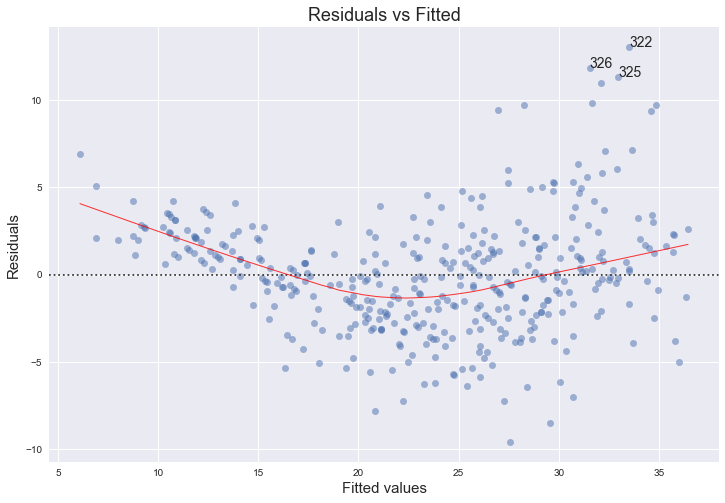

In [84]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'mpg', data=auto,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

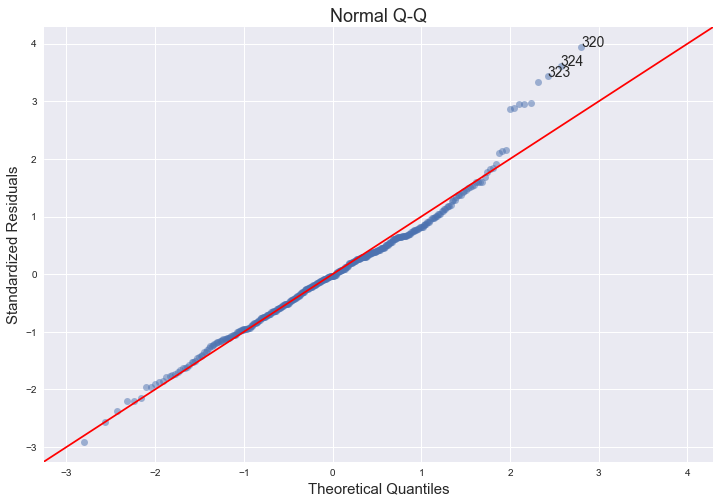

In [85]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

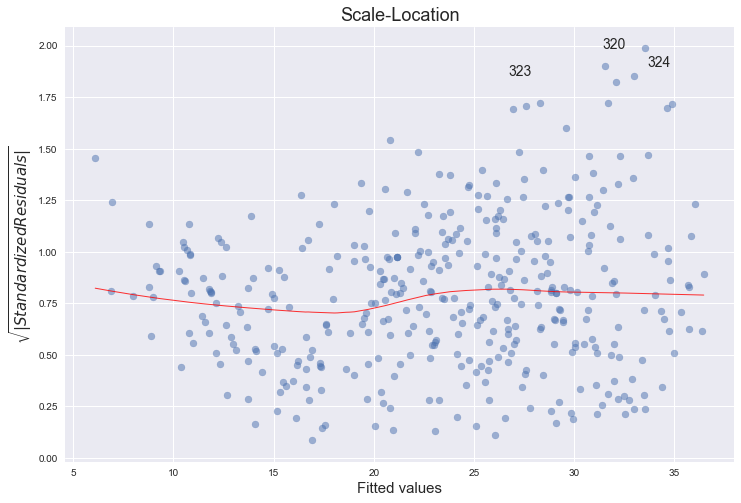

In [86]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

Examining the studentized residual plot it appears that observations 323, 320, and 324 are all approaching the +2 threshold of being considered as outliers.

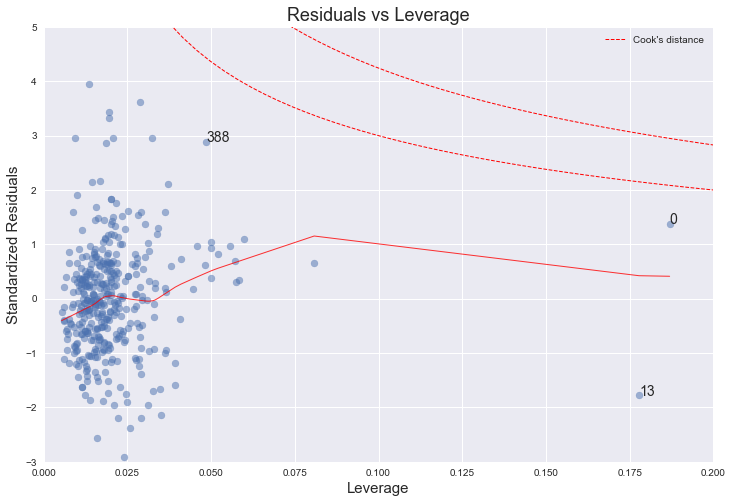

In [87]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(lm_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line

plt.legend(loc='upper right');

The leverage statistic threshold here is 9/392 = 0.0229. Observation 0 and 13 clearly fall well beyond this boundary suggesting that they are high leverage points. There is also a cluster of observations with questionably high leverage beyon 0.05.

(e)Use the  and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [88]:
lm_fit3 = smf.ols(formula='mpg~horsepower*weight + acceleration*displacement', data=auto).fit()
lm_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 19 Sep 2018   Prob (F-statistic):          1.74e-112
Time:                        21:52:29   Log-Likelihood:                -1089.7
No. Observations:                 392   AIC:                             2193.
Df Residuals:                     385   BIC:                             2221.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    59.3666      5.141     11.548      0.000      49.259      69.474
horsepower                   -0.2309      0.030     -7.650      0.000      -0.290      -0.172
weight                       -0.0090      0.001     -7.260      0.000      -0.011      -0.007
horsepower:weight          4.766e-05   7.76e-06      6.142      0.000    3.24e-05    6.29e-05
acceleration                  0.0876      0.184      0.475      0.635      -0.275       0.450
displacement                  0.0100      0.014      0.710      0.478      -0.018       0.038
acceleration:displacement    -0.0015      0.001     -1.580      0.115      -0.003       0.000
==============================================================================
Omnibus:                       44.515   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.471
Skew:                           0.708   Prob(JB):                     1.11e-16
Kurtosis:                       4.580   Cond. No.                     1.06e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The associated p-value with horespower+weight appears to be statistically significant while acceleration+displacement does not.

(f)Try a few different transformations of the variables, such as log(X), sqrtX, X2.Comment on your findings.

In [94]:
lm_fit4 = smf.ols(formula ='mpg~np.log(horsepower)', data=auto).fit()
lm_fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     758.8
Date:                Thu, 20 Sep 2018   Prob (F-statistic):           1.60e-93
Time:                        16:21:59   Log-Likelihood:                -1149.4
No. Observations:                 392   AIC:                             2303.
Df Residuals:                     390   BIC:                             2311.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            112.6450      3.246     34.700      0.000     106.263     119.027
np.log(horsepower)   -19.2162      0.698    -27.546      0.000     -20.588     -17.845
==============================================================================
Omnibus:                       13.345   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.301
Skew:                           0.333   Prob(JB):                     0.000289
Kurtosis:                       3.744   Cond. No.                         68.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.7 increase in R^2 value suggesting that this model may explain a greater proportion of the variation than the original
model

In [93]:
lm_fit5 = smf.ols(formula ='mpg~ horsepower + np.square(horsepower)', data=auto).fit()
lm_fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.1
Date:                Thu, 20 Sep 2018   Prob (F-statistic):           5.28e-99
Time:                        16:21:06   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                59.2781      1.867     31.750      0.000      55.607      62.949
horsepower               -0.4788      0.030    -15.723      0.000      -0.539      -0.419
np.square(horsepower)     0.0012      0.000     10.880      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.210   Durbin-Watson:                   1.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.784
Skew:                           0.219   Prob(JB):                     2.07e-07
Kurtosis:                       4.301   Cond. No.                     1.45e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

However, a quadratic model fits slightly better than the log transformation.

In [95]:
lm_fit6 = smf.ols(formula ='mpg~np.sqrt(horsepower)', data=auto).fit()
lm_fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     672.0
Date:                Thu, 20 Sep 2018   Prob (F-statistic):           7.35e-87
Time:                        16:22:21   Log-Likelihood:                -1164.8
No. Observations:                 392   AIC:                             2334.
Df Residuals:                     390   BIC:                             2342.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              59.6651      1.417     42.092      0.000      56.878      62.452
np.sqrt(horsepower)    -3.5070      0.135    -25.923      0.000      -3.773      -3.241
==============================================================================
Omnibus:                       16.598   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.455   Prob(JB):                     0.000119
Kurtosis:                       3.528   Cond. No.                         62.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The sqrt transformation is an improvement over the original model but less so than the log and quadratic transformations.

4. This question should be answered using the Carseats data set.

In [116]:
cs = pd.read_csv('/Users/jason/documents/UMKC/Fall_2018/Statistical_Learning/Lab1/Carseats_Lab2.csv')

In [144]:
cs.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Unnamed: 11
0,12.50,148,68,11,291,135,Bad,42,17,Yes,Yes,15.0
1,14.22,121,43,16,275,98,Good,65,10,Yes,Yes,NaN
2,13.06,123,30,10,284,95,Medium,59,12,Yes,Yes,NaN
3,10.40,127,95,4,481,112,Medium,55,14,Yes,Yes,NaN
4,7.15,151,59,3,355,143,Bad,38,13,Yes,No,NaN


In [123]:
columns = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']

In [124]:
carseats = cs[columns]

In [145]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,12.50,148,68,11,291,135,Bad,42,17,Yes,Yes
1,14.22,121,43,16,275,98,Good,65,10,Yes,Yes
2,13.06,123,30,10,284,95,Medium,59,12,Yes,Yes
3,10.40,127,95,4,481,112,Medium,55,14,Yes,Yes
4,7.15,151,59,3,355,143,Bad,38,13,Yes,No


(a)Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [128]:
cs_fit = smf.OLS.from_formula('Sales ~ Price+Urban+US', data=carseats).fit()

In [130]:
cs_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 20 Sep 2018   Prob (F-statistic):           2.39e-23
Time:                        16:39:08   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       16.8604      0.723     23.322      0.000      15.439      18.282
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         782.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b)Provide an interpretation of each coefficient in the model. Be careful some of thevariables in the model are qualitative!

Urban appears to have a negative impact, although the p-value suggests that this is not significant. However, US appears to have a significant positive impact on sales. Finally, price appears to have a significant negative impact on sales.

(c)Write out the model in equation form, being careful to handle the qualitative variables properly.

Sales = Bo + B1price + B2US(if US = Yes) + B3Urban(if Urban = Yes)

(d)For which of the predictors can you reject the null hypothesis

US and price

(e)On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the out-come.

In [131]:
cs_fit2 = smf.OLS.from_formula('Sales ~ Price+US', data=carseats).fit()

In [132]:
cs_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 20 Sep 2018   Prob (F-statistic):           2.66e-24
Time:                        16:41:15   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.8480      0.706     23.879      0.000      15.461      18.235
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         761.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(f)How well do the models in (a) and (e) fit the data?

The R^2 values for both models are relatively low. This suggests that our model does not explain a very large proportion of the variability of the response.

(g)Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

Intercept = 15.461-18.235 
US = 0.692-1.708
Price = -0.065 - -0.044

(h)Is there evidence of outliers or high leverage observations in the model from (e)?

In [151]:
# fitted values (need a constant term for intercept)
model_fitted_y = cs_fit2.fittedvalues

# model residuals
model_residuals = cs_fit2.resid

# normalized residuals
model_norm_residuals = cs_fit2.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = cs_fit2.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = cs_fit2.get_influence().cooks_distance[0]

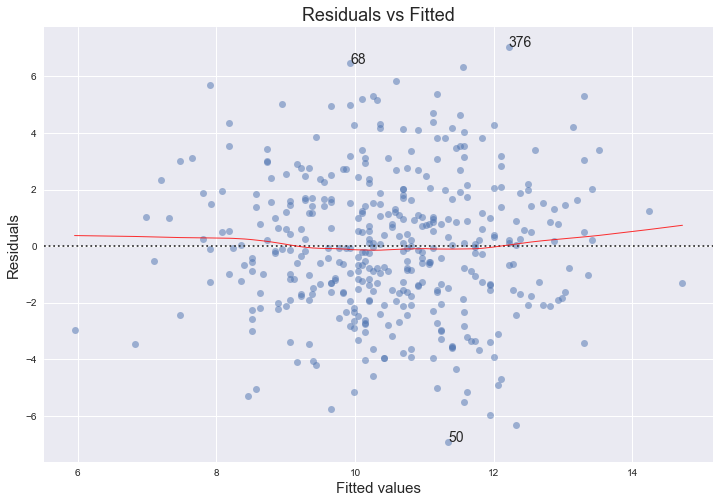

In [152]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'Sales', data=carseats,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

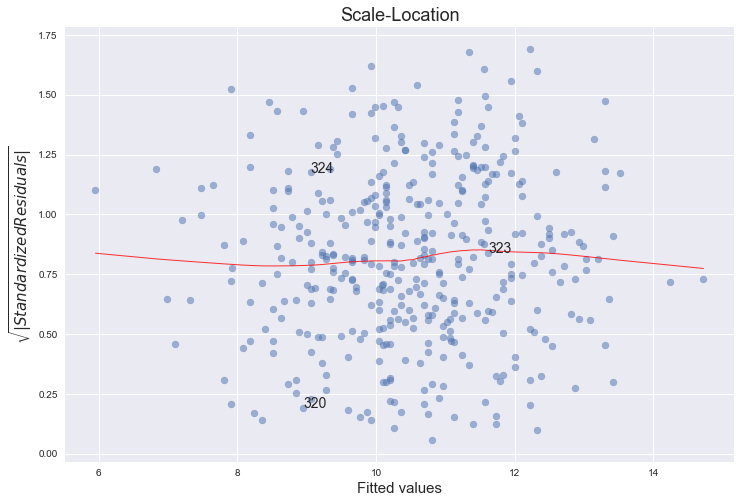

In [153]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

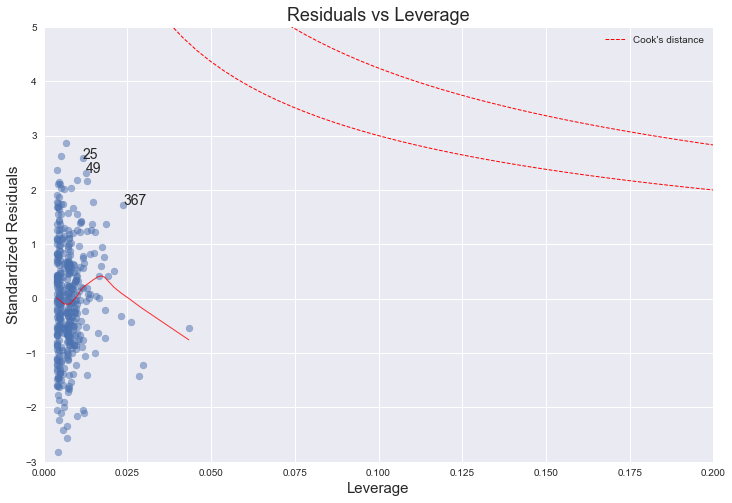

In [154]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(lm_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line

plt.legend(loc='upper right');

Due to the high variability in the data it is difficult to discern outliers and high leverage points.

5.In this problem we will investigate the t-statistic for the null hypothesisH0:= 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.

In [134]:
np.random.seed(1)

In [135]:
x = np.random.randn(100)

In [136]:
y = 2*x+np.random.randn(100)

(a)Perform a simple linear regression of y on to x, without an intercept. Report the coefficient estimateˆ, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesisH0:= 0. Commenton these results.  (You can perform regression without an intercept using thecommandlm(yx+ 0).)

In [138]:
n = 100
df = pd.DataFrame()
np.random.seed(1)
df['x1'] = np.random.randn(n)
df['y'] = 2*df['x1'] + np.random.randn(n)
rd_fit = smf.ols('y ~ x1 + 0', data=df).fit()
rd_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Thu, 20 Sep 2018   Prob (F-statistic):           3.46e-36
Time:                        16:52:53   Log-Likelihood:                -135.67
No. Observations:                 100   AIC:                             273.3
Df Residuals:                      99   BIC:                             275.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2 and p-value of the coefficient both suggests a strong relationship between these variables.

(b)Now perform a simple linear regression of x on to y with an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic andp-values associated with the null hypothesisH0:= 0.  Comment on theseresults.

In [139]:
rd_fit2 = smf.ols('y ~ x1', data=df).fit()
rd_fit2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Thu, 20 Sep 2018   Prob (F-statistic):           5.39e-36
Time:                        16:55:24   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1470      0.094      1.564      0.121      -0.039       0.334
x1             2.0954      0.106     19.783      0.000       1.885       2.306
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R^2 statistic increased slightly suggesting a slightly better fit. Along with an increased t-statistic for the coefficient of the predictor variable. The intercepts associated p-value suggests that this variable is not statistcally related to the outcome variable.  

In [146]:
df.head()

,x1,y
0,1.624345,2.801562
1,-0.611756,0.000995
2,-0.528172,-0.652852
3,-1.072969,-1.552359
4,0.865408,0.635903


(c)What is the relationship between the results obtained in (a) and (b)?

Fitting the regression line without an intercept is interpreting the fit as though you are accepting the null hypothesis that the intercept coefficient is 0.

For the regression of Y on to X without an intercept, the t-statistic for H0:= 0 takes the formˆ =SE(ˆ), whereˆis given by (3.38), and whereSE(ˆ) =vuut∑ni=1(yixiˆ)2(n1)∑ni′=1x2i′:(These formulas are slightly different from those given in Sections 3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically,and confirm numerically in R, that the t-statistic can be written as(pn1)∑ni=1xiyi√(∑ni=1x2i)(∑ni′=1y2i′)(∑ni′=1xi′yi′)

Using substitutions a = sum(xy), b = sum(x_predicted^2), c = sum(x^2), d = sum(y^2), f = sum((x_predicted)(y_predicted)), g = sum((y - x(a/b))^2), h = n-1 

(a/b)/(sqrt(g/hb)) = (sqrt(h)a)/(sqrt(cd-f^2)) ##square both sides

(a^2/b^2)/(g/hb) = h(a^2)/(cd-f^2) ##fix fractions

(a^2)h/(bg) = h(a^2)/(cd-f^2) 

(a^2)h/(bg) - h(a^2)/(cd-f^2) = 0 ##multiply by 1

(a^2)(h)(cd-f^2)-(a^2)(h)(bg)/(bg)(cd-f^2) = 0 ##cancel

(a^2)(h) - (a^2)(h) = 0

0 = 0


In [148]:
rd_fit3 = smf.ols('x1 ~ y + 0', data=df).fit()
rd_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     x1   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Thu, 20 Sep 2018   Prob (F-statistic):           3.46e-36
Time:                        17:42:32   Log-Likelihood:                -49.891
No. Observations:                 100   AIC:                             101.8
Df Residuals:                      99   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(e)Using the results from (d), argue that the t-statistic for the regression of y on to x is the same as the t-statistic for the regression of x on to y.

The t-statistic result was the same both algebraically as well as generating the fit. Mathematical proof

(f)In R, show that when regression is performed with an intercept, the t-statistic for H0:1= 0. is the same for the regression of y on to x as it is for the regression of x on to y.

In [150]:
rd_fit4 = smf.ols('x1 ~ y + 0', data=df).fit()
rd_fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     x1   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Thu, 20 Sep 2018   Prob (F-statistic):           3.46e-36
Time:                        22:27:00   Log-Likelihood:                -49.891
No. Observations:                 100   AIC:                             101.8
Df Residuals:                      99   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""